<a href="https://colab.research.google.com/github/chakatzib/CS430/blob/main/MLA2_JBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CS430/Steel_industry_data.csv')

In [3]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:


new_column_names = {
    'date': 'date',
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'CO2(tCO2)': 'co2',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'weekstatus',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}

df = df.rename(columns=new_column_names)

df.head()  # Print the DataFrame with the new column names

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,co2,lag_current_pwr,lead_current_pwr,nsm,weekstatus,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:




numerical_cols = df.select_dtypes(include=np.number).columns

summary_stats = df[numerical_cols].describe()

print(summary_stats)

          usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh           co2  \
count  35040.000000         35040.000000          35040.000000  35040.000000   
mean      27.386892            13.035384              3.870949      0.011524   
std       33.444380            16.306000              7.424463      0.016151   
min        0.000000             0.000000              0.000000      0.000000   
25%        3.200000             2.300000              0.000000      0.000000   
50%        4.570000             5.000000              0.000000      0.000000   
75%       51.237500            22.640000              2.090000      0.020000   
max      157.180000            96.910000             27.760000      0.070000   

       lag_current_pwr  lead_current_pwr           nsm  
count     35040.000000      35040.000000  35040.000000  
mean         80.578056         84.367870  42750.000000  
std          18.921322         30.456535  24940.534317  
min           0.000000          0.000000      0.000

In [9]:

load_type_counts = df['load_type'].value_counts()
load_type_counts_df = pd.DataFrame({'Load Type': load_type_counts.index, 'Count': load_type_counts.values})
print(load_type_counts_df)

      Load Type  Count
0    Light_Load  18072
1   Medium_Load   9696
2  Maximum_Load   7272


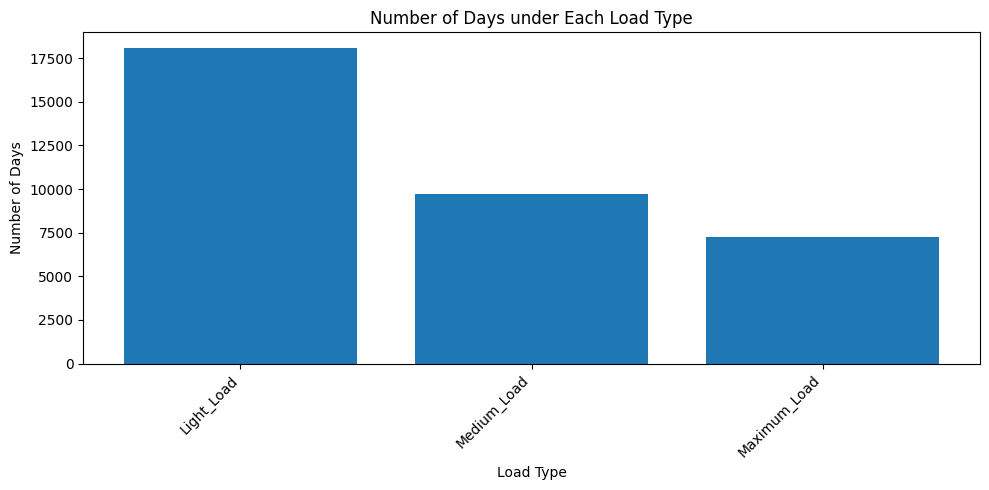

In [10]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.bar(load_type_counts_df['Load Type'], load_type_counts_df['Count'])
plt.xlabel('Load Type')
plt.ylabel('Number of Days')
plt.title('Number of Days under Each Load Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

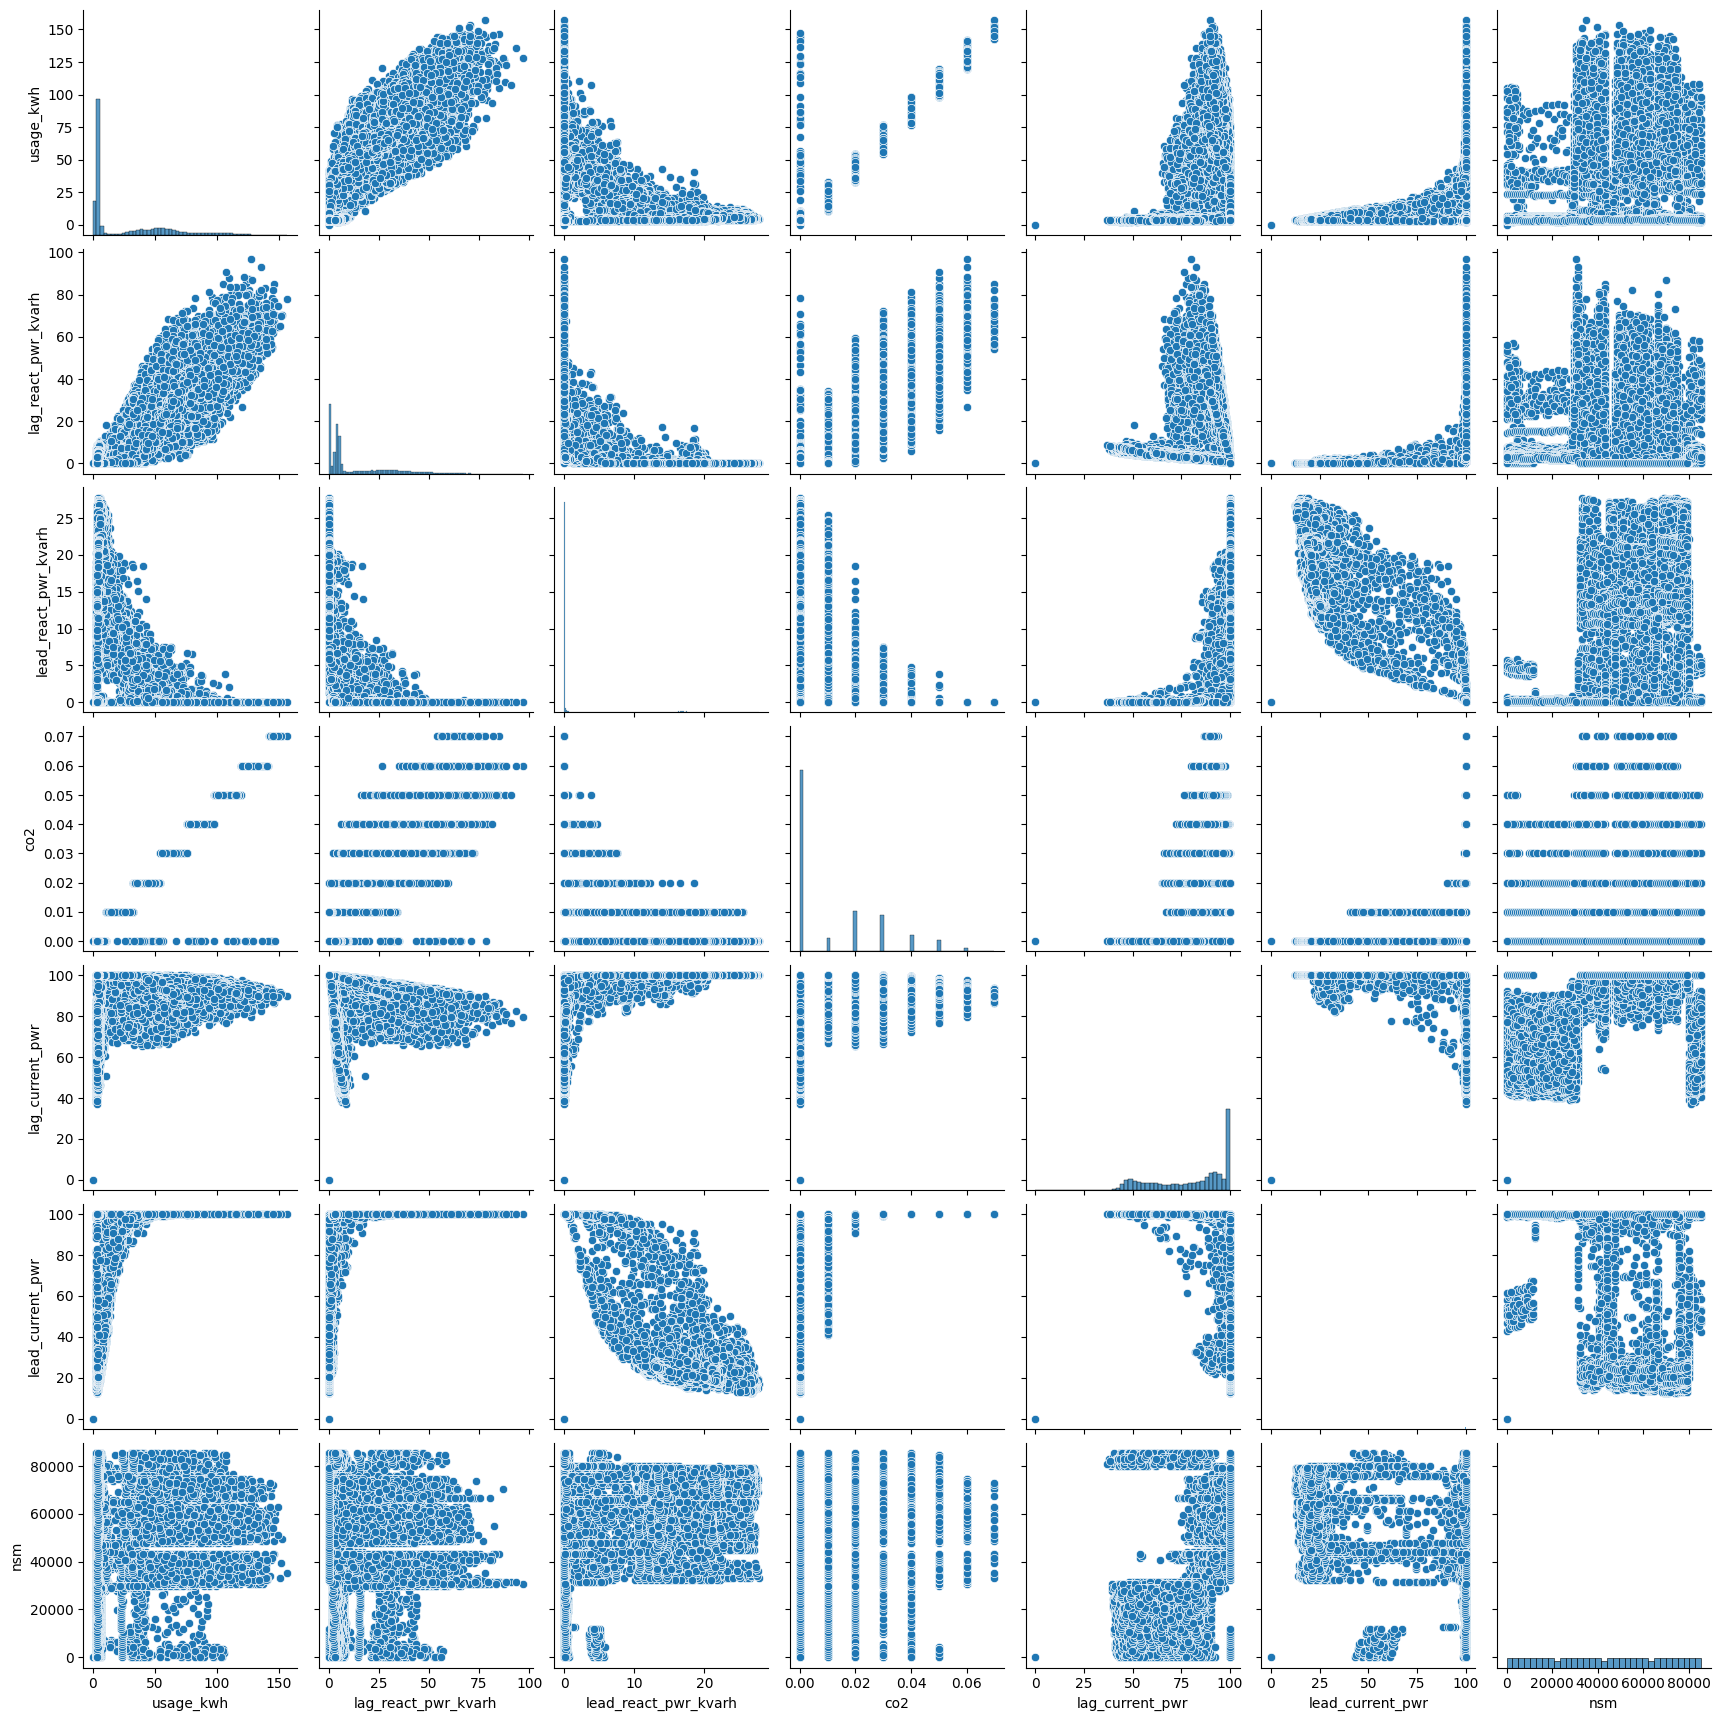

In [11]:

sns.pairplot(df[numerical_cols])
plt.show()

the lag_current_pwr row has some really weird distributions of data, while the co2 row is probably the least interesting.


In [12]:

X = df.drop(['usage_kwh', 'date'], axis=1)

In [13]:

y = df[['usage_kwh']]

In [25]:

test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [35]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_features = ['weekstatus', 'day_of_week', 'load_type']
numerical_features = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'co2', 'lag_current_pwr', 'lead_current_pwr', 'nsm']

# Create a ColumnTransformer
ct = ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('minmax', StandardScaler(), numerical_features)
    ], remainder='passthrough')

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
Pipeline = Pipeline([
    ('column_transformer', ColumnTransformer),
    ('model', LinearRegression())
])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


# Create a ColumnTransformer
ct = ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ], remainder='passthrough')

pipeline = Pipeline([
    ('transformer', ct),
    ('model', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score # Import necessary metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 17.847213587762393
R-squared: 0.9842994080486851


In [41]:

y_pred = pipeline.predict(X_test)

In [44]:

# Calculate RMSE for training data
y_train_pred = pipeline.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate RMSE for test data
y_test_pred = pipeline.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Training Root Mean Squared Error: {train_rmse}")
print(f"Test Root Mean Squared Error: {test_rmse}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Training Root Mean Squared Error: 4.785925743866111
Test Root Mean Squared Error: 4.224596263285096
R^2 Score: 0.9842994080486851


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:

coefficients = pipeline.named_steps['model'].coef_

print("Coefficients:", coefficients)


Coefficients: [[ 1.66721623e+13  2.99711284e+12 -1.98448214e+13 -1.98448214e+13
  -6.16977195e+12 -6.16977195e+12 -1.98448214e+13 -1.98448214e+13
  -1.98448214e+13  3.07006862e+11  3.07006862e+11  3.07006862e+11
   5.32509482e+00  5.23030095e-01  2.64658052e+01  2.30559200e+00
   1.85068133e+00 -7.49359131e-02]]


In [47]:
intercept = pipeline.named_steps['model'].intercept_

print("Intercept:", intercept)

Intercept: [2.86565224e+12]


Considering how high the R squared value is, I would say that this is a good model to predict weekstatus with.

In [ ]:
##LOGISTIC REGRESSION


In [52]:
df=df.replace({'weekstatus': {'Weekday': 1, 'Weekend': 0}})

<ipython-input-52-9d569b925750>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'weekstatus': {'Weekday': 1, 'Weekend': 0}})


In [53]:
X=df.drop(['weekstatus', 'day_of_week','date'], axis=1)
y=df[['weekstatus']]

In [54]:
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [55]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_features = ['weekstatus', 'day_of_week', 'load_type']
numerical_features = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'co2', 'lag_current_pwr', 'lead_current_pwr', 'nsm']

# Create a ColumnTransformer
ct = ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('minmax', StandardScaler(), numerical_features)
    ], remainder='passthrough')

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
Pipeline = Pipeline([
    ('column_transformer', ColumnTransformer),
    ('model', LogisticRegression())
])

In [62]:
from sklearn.pipeline import Pipeline  # Import Pipeline class
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('transformer', ct),
    ('model', LogisticRegression())
])

In [72]:

y_pred = pipeline.predict(X_test)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
plot_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=plot_cm)
disp.plot()

ValueError: Classification metrics can't handle a mix of binary and continuous targets